In [89]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## 1

In [14]:
df = pd.read_csv('../data/ab-test.csv')
df = df.drop(columns=['uid'])
df.info()
# нет пустых значений, нечего downcast-ить, df маленький, 1.5КБ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   diff    44 non-null     float64
 1   time    44 non-null     object 
 2   group   44 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [15]:
df.head()

,diff,time,group
0,-103.333333,after,test
1,-6.000000,before,test
2,-10.000000,after,test
3,-3.500000,before,test
4,-82.333333,after,test


## 2

In [56]:
before_data = (
    df[df['time'] == 'before']
    .set_index('group')
    .drop(columns='time')
)
before_test_data = before_data[before_data.index == 'test']['diff'].values
before_control_data = before_data[before_data.index == 'control']['diff'].values

after_data = (
    df[df['time'] == 'after']
    .set_index('group')
    .drop(columns='time')
)
after_test_data = after_data[after_data.index == 'test']['diff'].values
after_control_data = after_data[after_data.index == 'control']['diff'].values

Text(0.5, 0.98, 'Lag before labs deadlines. After and before the Newsfeed')

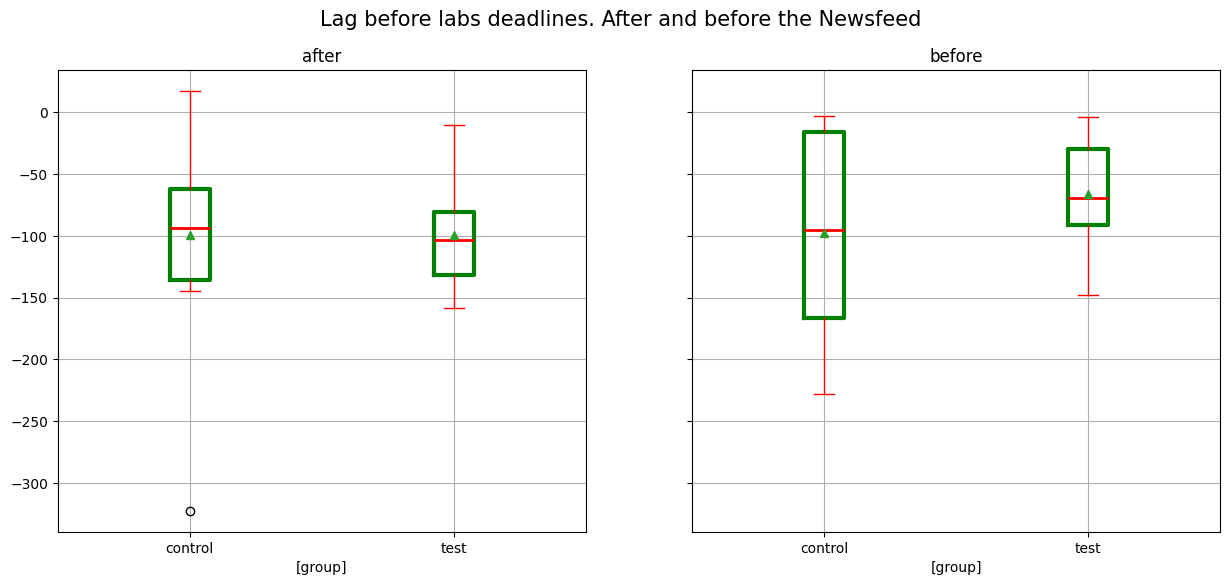

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

ax1.set_title('after')
ax1.grid(True)
ax1.set_xlabel('[group]')
ax1.boxplot([after_control_data, after_test_data], tick_labels=['control', 'test'],
            showmeans=True,
            medianprops=dict(color='red', linewidth=2),
            boxprops=dict(color='green', linewidth=3),
            whiskerprops=dict(color='red'),
            capprops=dict(color='red'))


ax2.set_title('before')
ax2.grid(True)
ax2.set_xlabel('[group]')
ax2.boxplot([before_control_data, before_test_data], tick_labels=['control', 'test'],
            showmeans=True,
            medianprops=dict(color='red', linewidth=2),
            boxprops=dict(color='green', linewidth=3),
            whiskerprops=dict(color='red'),
            capprops=dict(color='red'))

fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', size=15)


## 3

What was the IQR of the control group before the newsfeed? - About 150